In [1]:
from bdd import ConnexionMongoDB
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
conn = ConnexionMongoDB()
data = conn.userTweets(2500)


In [3]:
data.head(5)

,nbtweet,ftweets,agressivity,visibility,avgUrls,ratio,avgMention,avgHashtag
0,66656,0.119512,0.000512,0.068571,0.5,35.316995,0.666667,1.0
1,12159,-1.000000,0.000548,0.040714,0.0,3.251309,1.000000,0.0
2,29724,-1.000000,0.000548,0.000000,1.0,9.445135,0.000000,0.0
3,13879,-1.000000,0.000548,0.041429,0.0,19.555050,0.000000,1.0
4,11717,-1.000000,0.000548,0.165000,0.0,4.709850,1.000000,3.0


array([[<Axes: xlabel='nbtweet', ylabel='nbtweet'>,
        <Axes: xlabel='ftweets', ylabel='nbtweet'>,
        <Axes: xlabel='agressivity', ylabel='nbtweet'>,
        <Axes: xlabel='visibility', ylabel='nbtweet'>,
        <Axes: xlabel='avgUrls', ylabel='nbtweet'>,
        <Axes: xlabel='ratio', ylabel='nbtweet'>,
        <Axes: xlabel='avgMention', ylabel='nbtweet'>,
        <Axes: xlabel='avgHashtag', ylabel='nbtweet'>],
       [<Axes: xlabel='nbtweet', ylabel='ftweets'>,
        <Axes: xlabel='ftweets', ylabel='ftweets'>,
        <Axes: xlabel='agressivity', ylabel='ftweets'>,
        <Axes: xlabel='visibility', ylabel='ftweets'>,
        <Axes: xlabel='avgUrls', ylabel='ftweets'>,
        <Axes: xlabel='ratio', ylabel='ftweets'>,
        <Axes: xlabel='avgMention', ylabel='ftweets'>,
        <Axes: xlabel='avgHashtag', ylabel='ftweets'>],
       [<Axes: xlabel='nbtweet', ylabel='agressivity'>,
        <Axes: xlabel='ftweets', ylabel='agressivity'>,
        <Axes: xlabel='agressivi

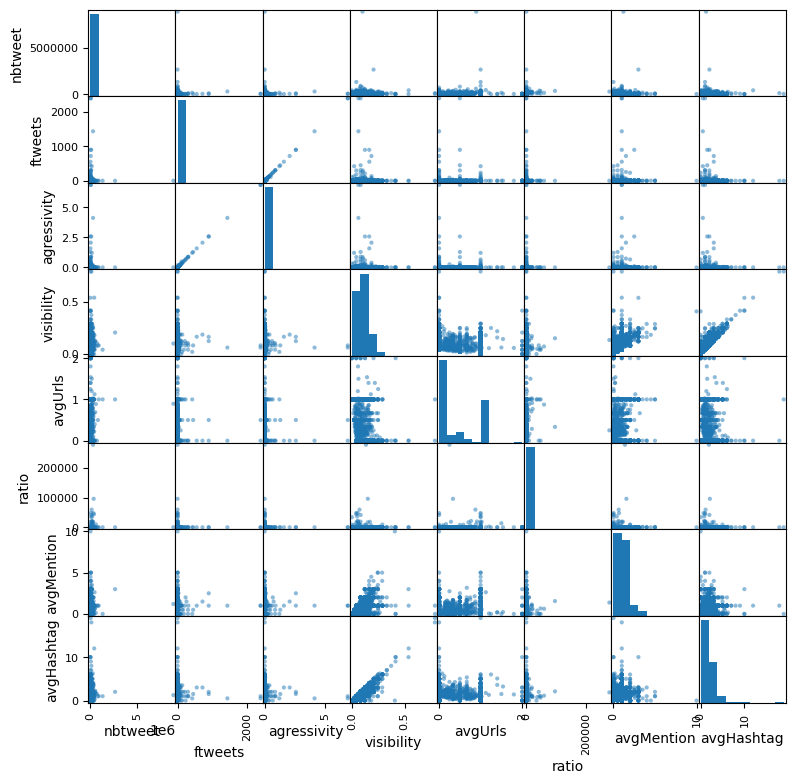

In [4]:
scatter_matrix(data, figsize=(9,9))

In [5]:
# Centrer et réduire les données
data_cr = StandardScaler().fit_transform(data.values)

# ACP
acp = PCA()
coord = acp.fit_transform(data_cr)
print(coord)

# Nombre de composantes calculées
n = acp.n_components_
print(f'Nombre de composantes : {n}')

[[-5.88367103e-01 -5.40444579e-02  1.12376926e-01 ...  7.14359174e-02
  -6.64510555e-03  1.01434133e-14]
 [-9.11038604e-01  1.08427393e-02 -2.62989199e-01 ... -4.64570735e-01
   1.86081652e-03 -3.53982935e-15]
 [-2.33596865e+00  2.48732026e-02  1.39544727e-01 ...  5.91379688e-01
   3.49985397e-03 -5.98232001e-15]
 ...
 [-9.47618975e-01 -4.15248908e-02 -7.22314422e-01 ... -8.44576393e-01
   2.81964944e-03 -4.92786426e-15]
 [ 2.00091700e+00 -2.39869937e-01  7.46924435e-01 ...  7.62940045e-01
  -6.70760204e-03  1.11543545e-14]
 [-6.93996090e-02 -1.20143661e-01 -7.56811412e-01 ... -7.94861845e-01
   3.19947915e-03 -5.05464551e-15]]
Nombre de composantes : 8


In [6]:
# On récupère les valeurs propres, les variances et les inerties
variance = acp.explained_variance_
print("Variance : ")
print(variance)

eigval = variance*(len(data_cr)-1)/len(data_cr)
print("\nValeurs propres : ")
print(eigval)

# On vérifie que la somme des valeurs propres est bien égale au nombre de variables
print(f'\nVérification : {np.sum(eigval, axis=0)}')

# Pourcentage d'inertie expliquée par chaque axe
np.set_printoptions(suppress=True)
print("\nPourcentage d'inertie expliquée par chaque axe : ")
print(acp.explained_variance_ratio_*100)
print(f'Total : {np.sum(acp.explained_variance_ratio_*100)}')

Variance : 
[2.11238682e+00 2.00213872e+00 1.08312342e+00 9.71236633e-01
 9.28314884e-01 9.05792326e-01 2.08472975e-04 2.18812093e-16]

Valeurs propres : 
[2.11154187e+00 2.00133787e+00 1.08269017e+00 9.70848139e-01
 9.27943558e-01 9.05430009e-01 2.08389586e-04 2.18724568e-16]

Vérification : 8.000000000000005

Pourcentage d'inertie expliquée par chaque axe : 
[26.39427334 25.01672332 13.53362714 12.13560173 11.59929448 11.31787511
  0.00260487  0.        ]
Total : 100.0


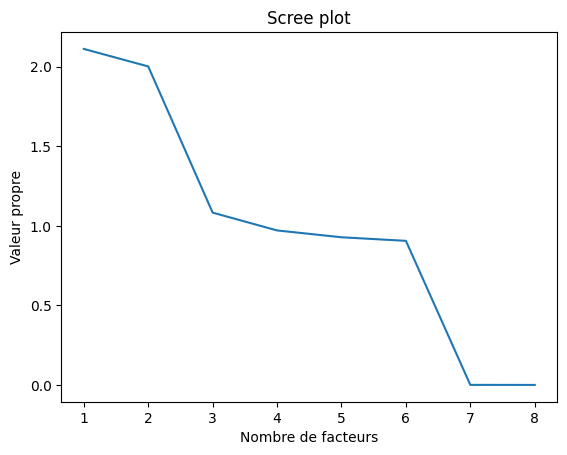

In [7]:
plt.figure(1)
plt.plot(np.arange(1, n+1), eigval)
plt.title("Scree plot")
plt.ylabel("Valeur propre")
plt.xlabel("Nombre de facteurs")
plt.show()

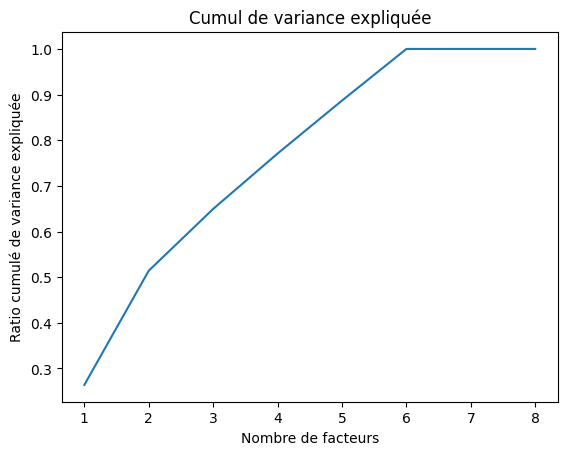

In [8]:
# Cumul de variance expliquée
plt.figure(2)
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Cumul de variance expliquée")
plt.ylabel("Ratio cumulé de variance expliquée")
plt.xlabel("Nombre de facteurs")
plt.show()

In [9]:
vp_mat = acp.components_.T
sqrt_eigval = np.sqrt(eigval)

# Corrélation des variables avec les axes
corvar = np.zeros((8,8))
for k in range(8):
     corvar[:,k] = vp_mat[:,k] * sqrt_eigval[k]

print(pd.DataFrame({'id':data.columns, 'COR1':corvar[:,0], 'COR2':corvar[:,1]}))

            id      COR1      COR2
0      nbtweet  0.028606  0.012127
1      ftweets  0.069505  0.997058
2  agressivity  0.069462  0.997090
3   visibility  0.984573 -0.071662
4      avgUrls -0.342339 -0.008786
5        ratio  0.001041 -0.007826
6   avgMention  0.533970  0.005554
7   avgHashtag  0.854026 -0.087018


<Figure size 640x480 with 0 Axes>

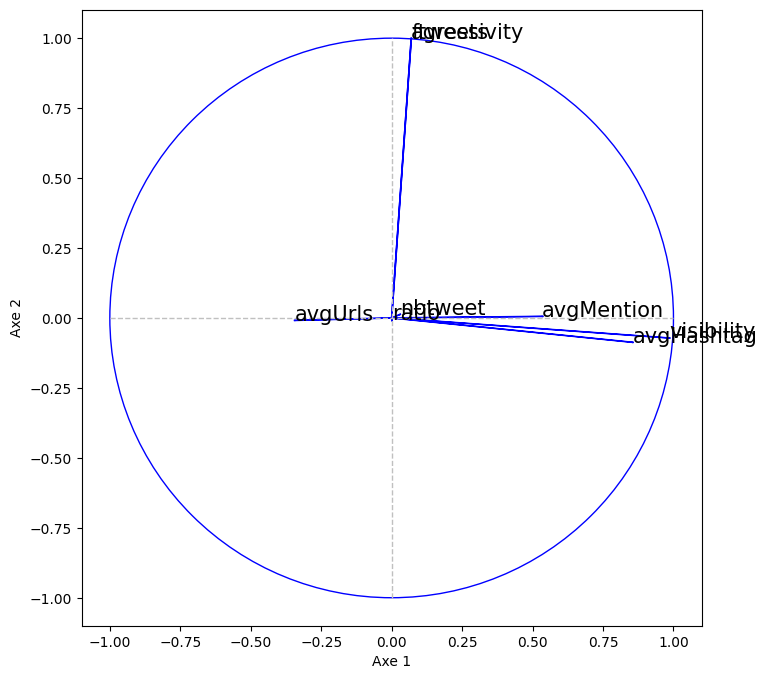

In [10]:
plt.figure(3)
# Cercle des corrélations pour les deux premiers axes
fig, axes = plt.subplots(figsize=(8,8))

# les points
#plt.scatter(corvar[:,0],corvar[:,1])

for i in range(0, acp.components_.shape[1]):
    axes.arrow(0,
             0,  # Start the arrow at the origin
             corvar[i,0],
             corvar[i,1],  #1 for PC2  
             color='blue')

# affichage des étiquettes (noms des variables)
for j in range(8):
     plt.annotate(data.columns[j],(corvar[j,0],corvar[j,1]), fontsize=15)

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.xlabel('Axe 1')
plt.ylabel('Axe 2')

#affichage
plt.show()

In [11]:
# Contributions des variables aux axes 
ctrvar = corvar**2
for j in range(8):
  ctrvar[:,j] = np.round(ctrvar[:,j]/eigval[j], 6)
pd.DataFrame({'id':data.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})

,id,CTR_1,CTR_2
0,nbtweet,0.000388,0.000073
1,ftweets,0.002288,0.496731
2,agressivity,0.002285,0.496762
3,visibility,0.459089,0.002566
4,avgUrls,0.055503,0.000039
5,ratio,0.000001,0.000031
6,avgMention,0.135031,0.000015
7,avgHashtag,0.345416,0.003784


/var/folders/j1/pf2y6wvd0v76nhhjc3_vbw3w0000gp/T/ipykernel_73549/450809255.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(coord[:, 0], coord[:, 1], cmap='viridis', s=50, alpha=0.5)


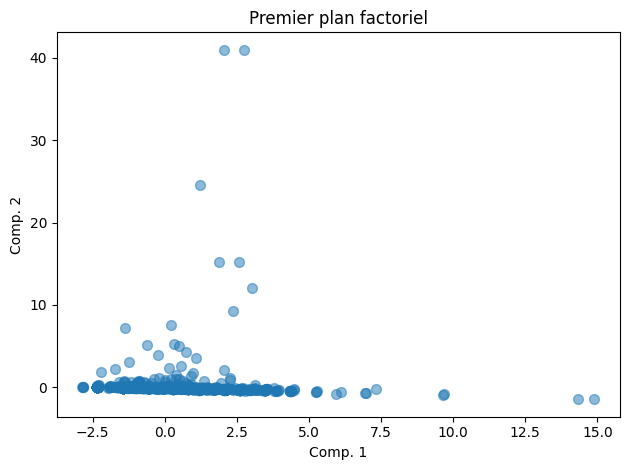

In [12]:
plt.figure(4)
plt.scatter(coord[:, 0], coord[:, 1], s=50, alpha=0.5)
plt.title('Premier plan factoriel')
plt.xlabel('Comp. 1')
plt.ylabel('Comp. 2')

plt.tight_layout()
plt.show() 

In [13]:
# 2ème plan factoriel
pd.DataFrame({'id':data.columns, 'COR3':corvar[:,2], 'COR4':corvar[:,3]})

,id,COR3,COR4
0,nbtweet,0.729439,-0.273744
1,ftweets,-0.004305,0.016758
2,agressivity,-0.005007,0.016242
3,visibility,0.040865,-0.012416
4,avgUrls,0.343350,-0.168828
5,ratio,0.584480,0.733303
6,avgMention,0.278738,-0.506589
7,avgHashtag,-0.108143,0.268969


<Figure size 640x480 with 0 Axes>

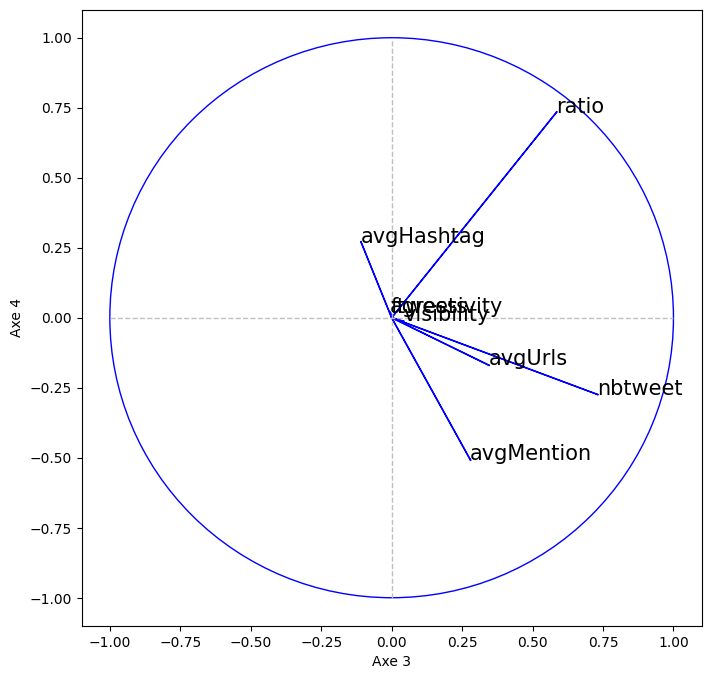

In [14]:
plt.figure(5)
# Cercle des corrélations pour les axes 3 et 4
fig, axes = plt.subplots(figsize=(8,8))

# les points
#plt.scatter(corvar[:,2],corvar[:,3])

for i in range(0, acp.components_.shape[1]):
    axes.arrow(0,
             0,  # Start the arrow at the origin
             corvar[i,2],
             corvar[i,3],  #1 for PC2  
             color='blue')

# affichage des étiquettes (noms des variables)
for j in range(8):
     plt.annotate(data.columns[j],(corvar[j,2],corvar[j,3]), fontsize=15)

# ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

# ajouter le cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.xlabel('Axe 3')
plt.ylabel('Axe 4')

#affichage
plt.show()

In [15]:
# Contributions des variables aux axes 3 et 4
pd.DataFrame({'id':data.columns,'CTR_3':ctrvar[:,2],'CTR_4':ctrvar[:,3]})

,id,CTR_3,CTR_4
0,nbtweet,0.491444,0.077186
1,ftweets,0.000017,0.000289
2,agressivity,0.000023,0.000272
3,visibility,0.001542,0.000159
4,avgUrls,0.108886,0.029359
5,ratio,0.315526,0.553880
6,avgMention,0.071761,0.264339
7,avgHashtag,0.010802,0.074517


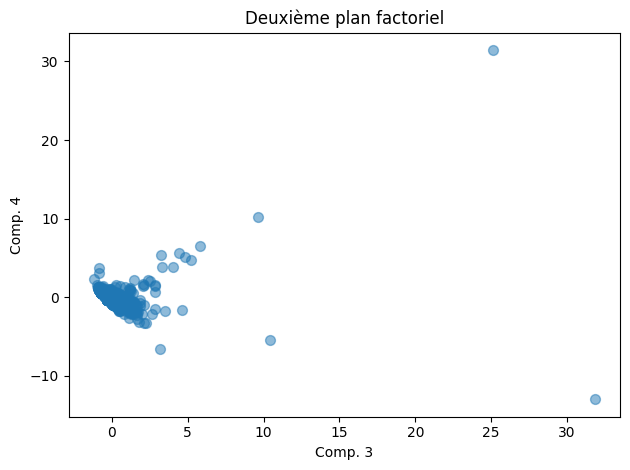

In [17]:
plt.figure(6)
plt.scatter(coord[:, 2], coord[:, 3], s=50, alpha=0.5)
plt.title('Deuxième plan factoriel')
plt.xlabel('Comp. 3')
plt.ylabel('Comp. 4')

plt.tight_layout()
plt.show() 